In [94]:
from sklearn import preprocessing
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as sns
import plotly.express as px

from datetime import datetime
import pandas as pd



In [95]:
with open('SampleInput.txt') as f:
    data = f.readlines()

print(len(data))

186322


Preprocessing and extraction of columns from the text file


In [96]:
columns = ['Year','Day','Hour','Minutes','Seconds','Milliseconds','unknown']
rows = []
for i in data:
    if 'DTG' in i:
        columns.append(i.replace('\n',''))
    elif len(i.split(" "))>5:
        new_list = [j for j in i.split(" ") if j not in ['',0,'\n']]

        date_string = str(new_list[1]) + " " +  str(new_list[0]) + " " +  str(new_list[2]) + " " +  str(new_list[3]) + " " +  str(new_list[4]) + " " +  str(new_list[5])
        date_object = datetime.strptime(date_string, "%j %Y %H %M %S %f")
        new_list = new_list[6:]
        date_str = date_object.strftime("%Y-%m-%d %H %M %S %f")
        new_list.insert(0, date_str)
        
        if new_list[14] == 'SYNC':
            new_list[14] = 1
        else:
            new_list[14] = 0
            
        if new_list[15] == 'ON':
            new_list[15] = 1
        else:
            new_list[15] = 0
            
        if new_list[16] == 'ON':
            new_list[16] = 1
        else:
            new_list[16] = 0
        
        if new_list[17] == 'ON':
            new_list[17] = 1
        else:
            new_list[17] = 0
            
        if new_list[18] == 'SYNC':
            new_list[18] = 1
        else:
            new_list[18] = 0
            
        if new_list[19] == 'NOT_USBL':
            new_list[19] = 0
        else:
            new_list[19] = 1
            
        if new_list[20] == 'ENA':
            new_list[20] = 1
        else:
            new_list[20] = 0
        
        if new_list[21] == 'LOW':
            new_list[21] = 0
        else:
            new_list[21] = 1
            
        if new_list[22] == 'ON':
            new_list[22] = 1
        else:
            new_list[22] = 0
            
        rows.append(new_list)


In [97]:

columns = ['Date']+columns[6:]
print(len(columns))


23


In [98]:
import pandas as pd
df = pd.DataFrame()


In [99]:
# for j in range(len(columns)):
for j in range(0,23,1):
    col_data = []
    for i in rows:
        if j != 0:
            col_data.append(float(i[j]))
        else: 
            col_data.append(i[j])
    df[columns[j]] = col_data
    


Preprocessed dataset

In [100]:
df

,Date,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),...,DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
0,2018-04-15 17 39 55 043000,22.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00695,0.00769,...,52.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
1,2018-04-15 17 39 55 555000,23.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,...,52.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2,2018-04-15 17 39 57 091000,26.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,...,52.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
3,2018-04-15 17 39 58 627000,29.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,...,52.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,2018-04-15 17 40 02 211000,4.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,...,52.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186293,2018-05-18 12 39 42 526000,22.0,-0.0469,-0.0385,0.00577,0.01131,-0.0981,-0.0687,0.00646,0.00799,...,51.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
186294,2018-05-18 12 39 43 038000,23.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00651,0.00804,...,51.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
186295,2018-05-18 12 39 44 574000,26.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00651,0.00804,...,51.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
186296,2018-05-18 12 39 46 110000,29.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00651,0.00804,...,51.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


In [101]:
# copy the data
df_max_scaled = df.copy()

df_max_scaled_with_date = df.copy()


# Convert first column from python string to pandas date object
for column in df_max_scaled.columns[:1]:
    df_max_scaled[column] = pd.to_datetime(df_max_scaled[column], format="%Y-%m-%d %H %M %S %f")

# apply normalization techniques
for column in df_max_scaled.columns[1:]:
    df_max_scaled[column] = df_max_scaled[column] /df_max_scaled[column].abs().max()

# view normalized data
display(df_max_scaled)


,Date,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),...,DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
0,2018-04-15 17:39:55.043,0.758621,-0.004392,-0.005299,0.431529,0.639840,0.013683,-0.009036,0.544671,0.525273,...,0.981132,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
1,2018-04-15 17:39:55.555,0.793103,-0.004392,-0.005299,0.431529,0.639840,0.013683,-0.009036,0.540752,0.525273,...,0.981132,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2,2018-04-15 17:39:57.091,0.896552,-0.004392,-0.005299,0.431529,0.639840,0.013683,-0.009036,0.540752,0.525273,...,0.981132,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
3,2018-04-15 17:39:58.627,1.000000,-0.004392,-0.005299,0.431529,0.639840,0.013683,-0.009036,0.540752,0.525273,...,0.981132,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,2018-04-15 17:40:02.211,0.137931,-0.004392,-0.005299,0.431529,0.639840,0.013683,-0.009036,0.540752,0.525273,...,0.981132,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186293,2018-05-18 12:39:42.526,0.758621,-0.004392,-0.005299,0.459395,0.645548,-0.010373,-0.009036,0.506270,0.545765,...,0.962264,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
186294,2018-05-18 12:39:43.038,0.793103,-0.004392,-0.005299,0.463376,0.645548,-0.010373,-0.009036,0.510188,0.549180,...,0.962264,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
186295,2018-05-18 12:39:44.574,0.896552,-0.004392,-0.005299,0.463376,0.645548,-0.010373,-0.009036,0.510188,0.549180,...,0.962264,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
186296,2018-05-18 12:39:46.110,1.000000,-0.004392,-0.005299,0.463376,0.645548,-0.010373,-0.009036,0.510188,0.549180,...,0.962264,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


In [102]:
# Filling out missing dates

print(df_max_scaled.iloc[0,:][0])
idx = pd.date_range(start = df_max_scaled.iloc[0,:][0], end = df_max_scaled.iloc[-1,:][0])
df_max_scaled.set_index('Date', inplace=True)

print(df_max_scaled)

# Check if data is correct
from adtk.data import validate_series
df_max_scaled = validate_series(df_max_scaled)
print(df_max_scaled)

2018-04-15 17:39:55.043000
                          unknown  DTG-1_PCH_ANALOG_RAT (Analog)  \
Date                                                               
2018-04-15 17:39:55.043  0.758621                      -0.004392   
2018-04-15 17:39:55.555  0.793103                      -0.004392   
2018-04-15 17:39:57.091  0.896552                      -0.004392   
2018-04-15 17:39:58.627  1.000000                      -0.004392   
2018-04-15 17:40:02.211  0.137931                      -0.004392   
...                           ...                            ...   
2018-05-18 12:39:42.526  0.758621                      -0.004392   
2018-05-18 12:39:43.038  0.793103                      -0.004392   
2018-05-18 12:39:44.574  0.896552                      -0.004392   
2018-05-18 12:39:46.110  1.000000                      -0.004392   
2018-05-18 12:43:55.455  0.137931                      -0.004392   

                         DTG-1_ROL_ANALOG_RAT (Analog)  \
Date                          

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >], dtype=object)

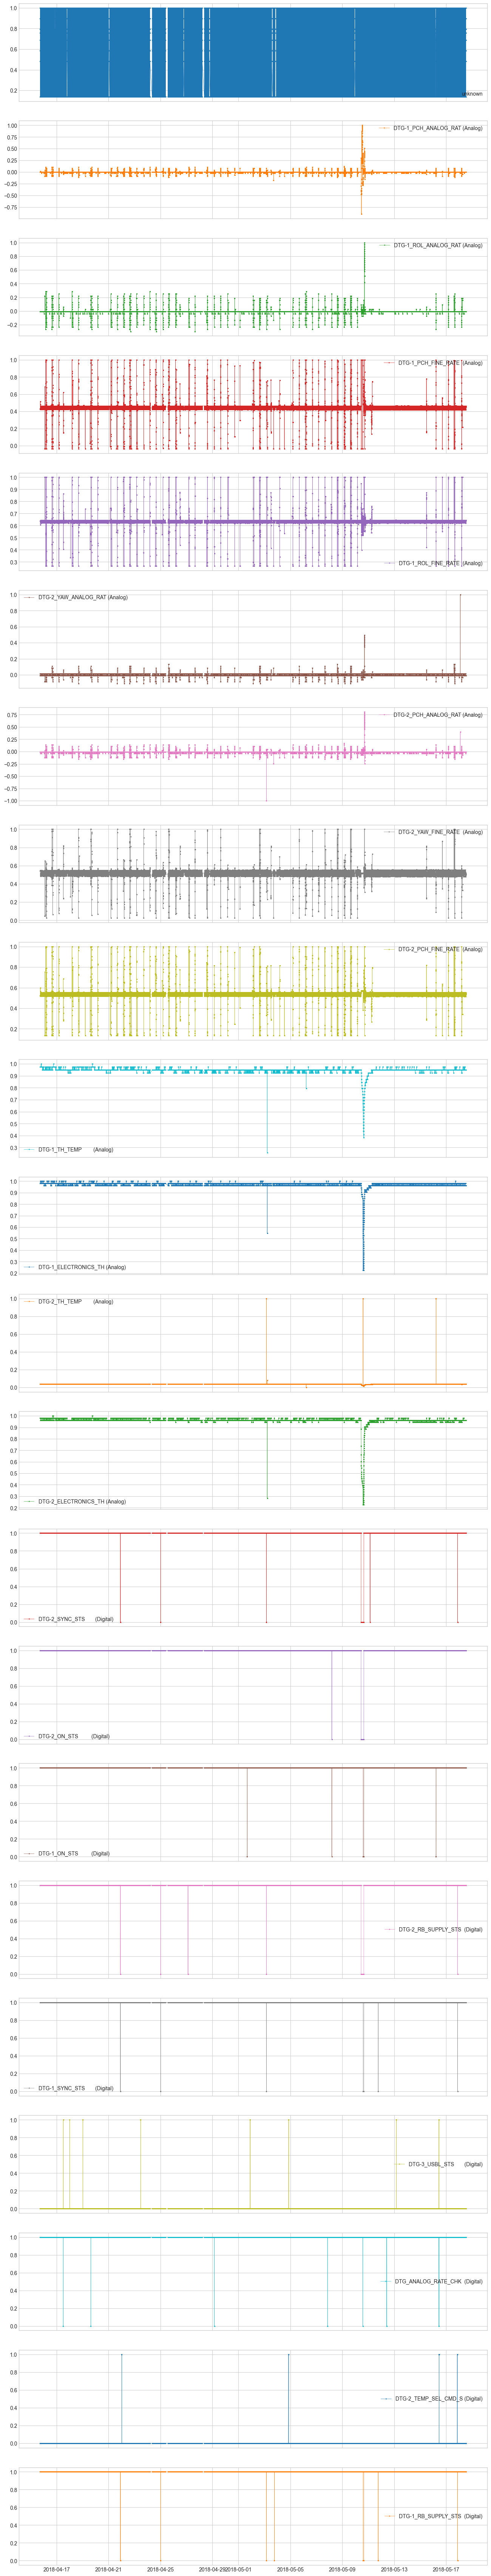

In [103]:
from adtk.visualization import plot
plot(df_max_scaled)

In [104]:

from adtk.detector import AutoregressionAD
auto_reg = AutoregressionAD()
anomalies = auto_reg.fit_detect(df_max_scaled)
print(anomalies)

indexDate = ''
maxAnomalyCount = 0
dateAnomalyParams = []
timesAtWhichAnomalieOccured = []

# Go through each row and find which date has maximum number of anomalies (True's)
for index, row in anomalies.iterrows():
    anomalyCountForDate = 0
    for column in anomalies.columns[1:]:
        if str(row[column]) == 'True':
            anomalyCountForDate = anomalyCountForDate + 1
            
    # find which date has max number of anomalies     
    if anomalyCountForDate >= maxAnomalyCount:
        dateAnomalyParams = []
        for column in anomalies.columns[1:]:
            if str(row[column]) == 'True':
                dateAnomalyParams.append(column)
        indexDate = index
        timesAtWhichAnomalieOccured.append(index)
        
        maxAnomalyCount = anomalyCountForDate

print('Predicted number of anomaly times: ', len(timesAtWhichAnomalieOccured))
print('Possible anomaly times:', )
for time in timesAtWhichAnomalieOccured:
    print(time)
print()

for date in timesAtWhichAnomalieOccured:
    
    print('On date ',date, maxAnomalyCount, 'parameters showed anomalies:')
    for i in  dateAnomalyParams:
        print(i)



                        unknown DTG-1_PCH_ANALOG_RAT (Analog)  \
Date                                                            
2018-04-15 17:39:55.043     NaN                           NaN   
2018-04-15 17:39:55.555   False                         False   
2018-04-15 17:39:57.091   False                         False   
2018-04-15 17:39:58.627   False                         False   
2018-04-15 17:40:02.211   False                         False   
...                         ...                           ...   
2018-05-18 12:39:42.526   False                         False   
2018-05-18 12:39:43.038   False                         False   
2018-05-18 12:39:44.574   False                         False   
2018-05-18 12:39:46.110   False                         False   
2018-05-18 12:43:55.455   False                         False   

                        DTG-1_ROL_ANALOG_RAT (Analog)  \
Date                                                    
2018-04-15 17:39:55.043                 

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >], dtype=object)

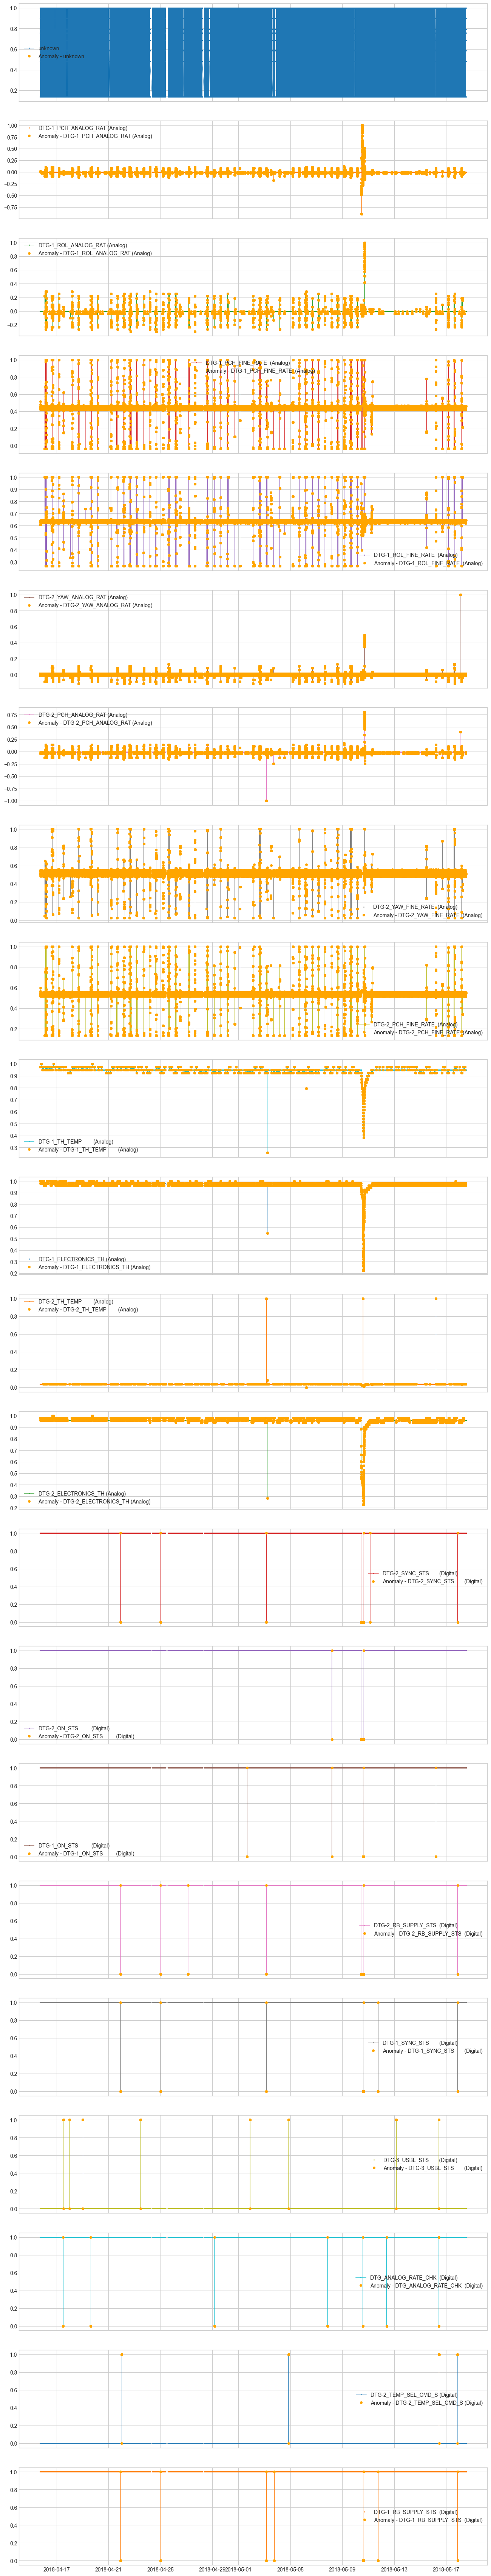

In [105]:
plot(df_max_scaled, anomaly=anomalies, anomaly_color="orange", anomaly_tag="marker")